# **Linear Regression Implementation on Housing Dataset**

Objective: Predict house prices using simple and multiple linear regression.



## 1: Import Libraries

In this step, we import all the necessary libraries required for data handling, visualization, model training, and evaluation.



In [29]:
# Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configure plots
%matplotlib inline
sns.set_style('whitegrid')

## 2: Load and Inspect Data

We load the dataset and examine its structure, contents, and statistical summary.

In [36]:
# Load dataset
df = pd.read_csv('data/Housing.csv')

# Display first 5 rows
print("Dataset Preview:")
display(df.head())

# Check data structure
print("\nData Summary:")
display(df.info())

# Descriptive statistics
print("\nDescriptive Statistics:")
df.describe()

Dataset Preview:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


None


Descriptive Statistics:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## 3: Data Preprocessing
 To prepare the data for modeling, we perform preprocessing on categorical variables and separate features from the target.

### 3.1 Encode Categorical Variables


In [38]:
# List binary categorical columns (yes/no)
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Map 'yes' -> 1, 'no' -> 0
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Encode furnishingstatus (ordinal: unfurnished < semi-furnished < furnished)
df['furnishingstatus'] = df['furnishingstatus'].map(
    {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}
)

In [39]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


### 3.2 Separate Features and Target

In [40]:
X = df.drop('price', axis=1)  # Features
y = df['price']               # Target

## 4: Train-Test Split (80-20)

We split the data into training and test sets using an 80-20 ratio.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (436, 12), Test set: (109, 12)


## 5: Train Linear Regression Model

We train a linear regression model on the training data.

In [27]:
# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)
# Display coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nModel Coefficients:")
display(coeff_df.sort_values('Coefficient', ascending=False))



Model Coefficients:


,Feature,Coefficient
2,bathrooms,1.097117e+06
8,airconditioning,7.855506e+05
7,hotwaterheating,6.878813e+05
10,prefarea,6.299017e+05
3,stories,4.062232e+05
6,basement,3.931598e+05
4,mainroad,3.668242e+05
5,guestroom,2.331468e+05
9,parking,2.257565e+05
11,furnishingstatus,2.103971e+05


## Step 6: Model Evaluation

We evaluate the model using common regression metrics on the test data.

In [26]:
# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"MAE: {mae:,.0f}")
print(f"MSE: {mse:,.0f}")
print(f"RMSE: {rmse:,.0f}")
print(f"R²: {r2:.4f}")

Evaluation Metrics:
MAE: 979,680
MSE: 1,771,751,116,594
RMSE: 1,331,071
R²: 0.6495


## Step 7: Visualize Results

Visualizing helps assess model performance visually.

### 7.1 Actual vs. Predicted Prices

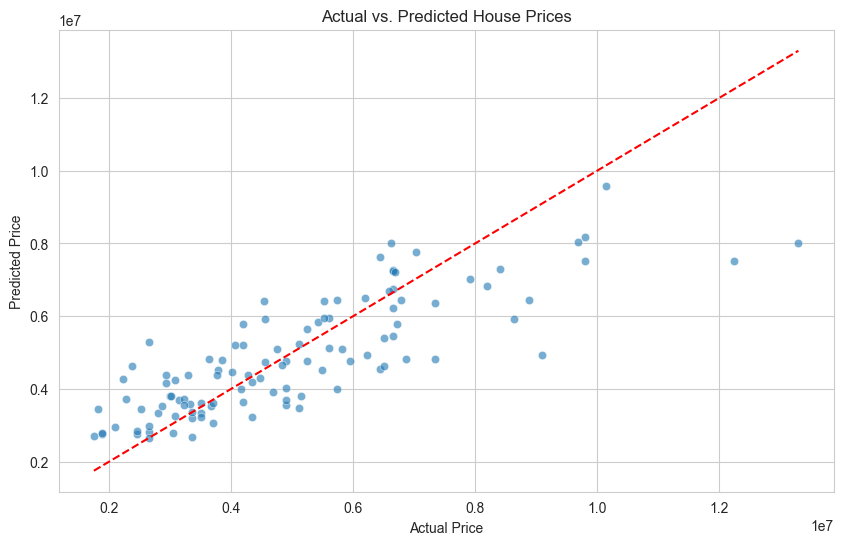

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Ideal line
plt.title('Actual vs. Predicted House Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

### 7.2 Residual Plot

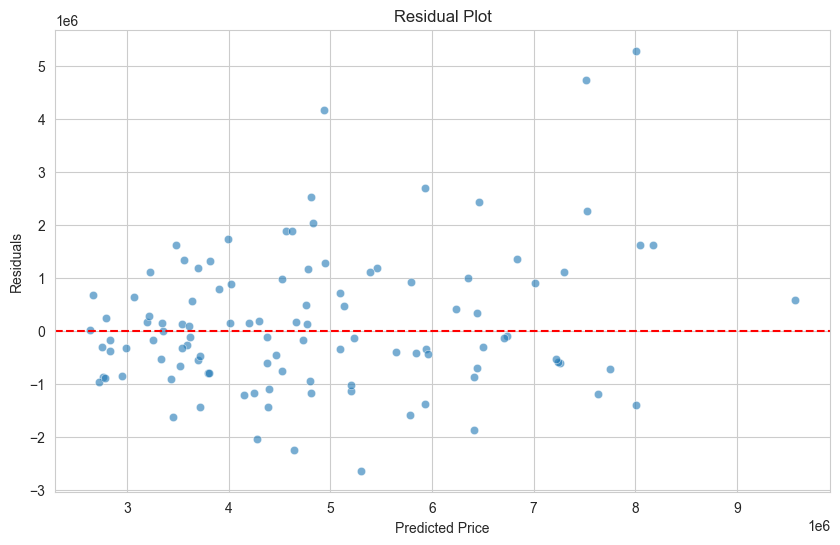

In [11]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.show()

### 8: **Results and Conclusion**

In this project, we implemented both simple and multiple linear regression models to predict house prices based on various features.

**Model Performance on Test Data:**

* **Mean Absolute Error (MAE)** indicates the average deviation of predictions from actual prices.
* **Mean Squared Error (MSE)** and **Root Mean Squared Error (RMSE)** provide insights into the magnitude of error — lower values signify better performance.
* The **R² Score** shows the proportion of variance in the house prices that can be explained by the model. An R² closer to 1 indicates a better fit.

**Visual Evaluation:**

* The **Actual vs. Predicted plot** showed that most predictions align closely with actual values, implying the model captures underlying patterns well.
* The **Residual plot** revealed a fairly random spread of residuals around zero, suggesting that the linear model's assumptions are reasonably met.

**Conclusion:**

* The multiple linear regression model performs decently on the housing dataset.
* It identifies significant features impacting house prices such as area, air conditioning, and furnishing status (as evident from the coefficients).
* While performance is acceptable, there is still room for improvement using more complex models (e.g., decision trees, random forests, or regularized regressions like Ridge/Lasso), better feature engineering, or outlier handling.

